# Capstone Webscrapping using BeautifulSoup - Ardy Satria

This notebook contains guidances & tasks on the data processing for the application

**Menganalisa dan membuat Plot pergerakan kurs USD <> IDR Harian**


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [20]:
import requests

link = 'https://www.exchange-rates.org/history/IDR/USD/T'
url_get = requests.get(link)

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="A" />\n<base href="https://www.exchange-rates.org/" />\n'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [21]:
table = soup.find('div',attrs={'id':'ctl00_M_pnlText'})
tr = table.find_all('tr')
print(table.prettify()[1:500])

div id="ctl00_M_pnlText">
 <div class="table-responsive">
  <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
   <tbody>
    <tr>
     <td>
      11/27/2020
     </td>
     <td>
      Friday
     </td>
     <td>
      <a href="/Rate/USD/IDR/11-27-2020">
       14,078.12448
      </a>
      IDR
     </td>
     <td class="text-narrow-screen-hidden">
      <a href="/Rate/USD/IDR/11-27-2020">
       USD IDR rate for 11/27/2020
      </a>
     </td>
    


Do the scrapping process here (please change this markdown with your explanation)

In [25]:
temp = [] #initiating a tuple

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
        
    #get tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip() #for removing the excess whitespace
    
    #get harga_harian
    harga_harian = row.find_all('a')[0].text
    harga_harian = harga_harian.strip()

    temp.append((tanggal,harga_harian)) #append the needed information
    
temp 

[('11/26/2020', '14,090.70769'),
 ('11/25/2020', '14,136.09929'),
 ('11/24/2020', '14,137.48161'),
 ('11/23/2020', '14,185.57119'),
 ('11/20/2020', '14,162.60519'),
 ('11/19/2020', '14,165.50144'),
 ('11/18/2020', '14,051.29503'),
 ('11/17/2020', '14,040.16051'),
 ('11/16/2020', '14,085.69501'),
 ('11/13/2020', '14,142.77143'),
 ('11/12/2020', '14,141.24303'),
 ('11/11/2020', '14,073.46024'),
 ('11/10/2020', '14,053.76135'),
 ('11/9/2020', '14,283.29667'),
 ('11/6/2020', '14,214.49744'),
 ('11/5/2020', '14,389.14027'),
 ('11/4/2020', '14,544.44634'),
 ('11/3/2020', '14,589.01774'),
 ('11/2/2020', '14,612.89990'),
 ('10/30/2020', '14,629.16216'),
 ('10/29/2020', '14,701.62361'),
 ('10/28/2020', '14,701.92586'),
 ('10/27/2020', '14,649.78960'),
 ('10/26/2020', '14,652.88010'),
 ('10/23/2020', '14,655.04157'),
 ('10/22/2020', '14,647.90877'),
 ('10/21/2020', '14,641.61060'),
 ('10/20/2020', '14,555.88071'),
 ('10/19/2020', '14,705.13256'),
 ('10/16/2020', '14,688.43616'),
 ('10/15/2020', 

## Creating data frame & Data wrangling

Put the array into dataframe

In [26]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('tanggal','harga_harian'))
df.head()

,tanggal,harga_harian
0,11/26/2020,"14,090.70769"
1,11/25/2020,"14,136.09929"
2,11/24/2020,"14,137.48161"
3,11/23/2020,"14,185.57119"
4,11/20/2020,"14,162.60519"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [37]:
df['tanggal'] = df['tanggal'].astype('datetime64')
df['harga_harian'] = df['harga_harian'].replace('[^\d.]+','',regex=True)
df['harga_harian'] = df['harga_harian'].astype('float64')

df.dtypes

tanggal         datetime64[ns]
harga_harian           float64
dtype: object

In [38]:
df.describe()

,harga_harian
count,146.000000
mean,14514.333568
std,280.428023
min,13867.953770
25%,14262.921967
50%,14616.820355
75%,14730.218907
max,14892.321940


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

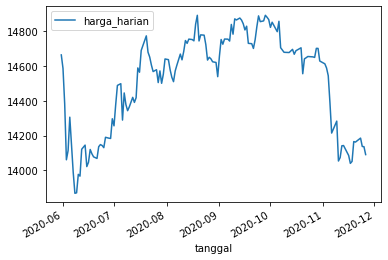

In [29]:
pl=df.set_index('tanggal')
pl.plot()


**Conclusion Harga rata-rata USD ke IDR ialah IDR 14,514  dan sempat menyentuh angka tertinggi IDR 14,892, sejak November 2020 mengalami trend penguatan**

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.